<p style='text-align: right;'><b>Data Scientist :</b> Ruslan S.</p>
<p style='text-align: right;'><b>Collaborator :</b> Luka Anicin</p>
</div>
<h1 style='text-align: center;'>Sentiment Analysis - Natural Language Processing</h1>
<h3>Steps : Data Wrangling, Exploratory Data Analysis (EDA)</h3>
<p><b>Introduction: </b>Natural language processing (NLP) relates to the branch of computer science (artificial intelligence or AI) and is concerned with giving machines the ability to understand text and spoken words in a much similar way as human beings can.</p>  
<p>Sentiment Analysis is the classification of people's feelings or expressions into different viewpoints. Sentiments could be Positive, Negative, Neutral, and so on. The process is done in different consumer-centered branches to investigate human opinions on a singular product or topic.</p>
<img src='img/2.jpg'>
<br><br><b>DATA STAGES:</b>
<ul>
    <li>Text iput</li>
    <li>Tokenization</li>
    <li>Stop Word Filtering</li>
    <li>Stemming</li>
    <li>Classification</li>
    <li>Sentiment Class</li>
</ul>

<h3>IMPORT LIBRARIES/PACKAGES...</h3>

In [86]:
# loading
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import tensorflow as tf

import re

import nltk # It's a library that performs text processing tasks for Natural Language Processing
nltk.download('stopwords') 
from nltk.corpus import stopwords # English words which does not add much meaning to a sentence
from nltk.stem import SnowballStemmer # Stemmers remove morphological affixes from words, leaving only the word stem

from wordcloud import WordCloud # It's a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1

from keras.preprocessing.text import Tokenizer # Text tokenization utility class
from keras.preprocessing.sequence import pad_sequences # It makes all the sequence in one constant length

# modeling part
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import itertools # Functions creating iterators for efficient looping - 'https://docs.python.org/3/library/itertools.html'
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras import Sequential
from keras.layers.embeddings import Embedding
from tensorflow.keras import layers
import tensorflow as tf

# tuning part
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rshul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>DATA CLEANING...</h3>

In [87]:
# loading data
path = "../data/raw/raw.csv"
df = pd.read_csv(filepath_or_buffer=path, header=None, encoding='latin')
df.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [88]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [89]:
# renaming columns
def renaming_df(df, col_names):
    df.columns = col_names
    print(df.head(3))
    return df

col_names = ['target', 'id', 'date', 'query', 'user_name', 'predictor']
df = renaming_df(df, col_names)

   target          id                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

         user_name                                          predictor  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  


<p><b>NOTE: </b>For our task, we need only two columns: target (sentiment level) and predictor (text/values). Others columns could be dropped.</p>

In [90]:
# dropping unnecessary columns
def drop_cols(df, col_names):
    df = df.drop(labels=col_names, axis=1)
    print(df.head(3))
    return df

col_names_drop = ['id', 'date', 'query', 'user_name']
df = drop_cols(df, col_names_drop)

   target                                          predictor
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...


In [91]:
# checking unique values for target column
df['target'].unique()

array([0, 4], dtype=int64)

In [92]:
# replacing 'Zero' value with word 'Negative' and 'Four' value with word 'Positive'
def col_substitution(df, col_name, dic_val):
    df[col_name] = df[col_name].map(dic_val)
    print("Unique values: ", df[col_name].unique())
    print(df.head(5))
    return df

dic_val = {
    0: 'Negative',
    4: 'Positive',
}
df = col_substitution(df, 'target', dic_val)

Unique values:  ['Negative' 'Positive']
     target                                          predictor
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....


In [93]:
# checking missing values
print(df['target'].isnull().sum())
print(df['predictor'].isnull().sum())

0
0


In [94]:
# checking duplicates (this step is optional, because some people could say the same thing a few times. I decided to drop them in case to work with unique values only.)
print(df.duplicated().sum())

16309


In [95]:
# handling duplicates
def drop_duplicates_df(df):
    df = df.drop_duplicates(ignore_index=True)
    print(df.duplicated().sum())
    return df

df = drop_duplicates_df(df)

0


<b>NOTE:</b> Now we need to look at the distribution of our data. It's very important to have evenly divided data sets (classes) for avoiding any bias issues in future analysis.

Text(0.5, 1.0, 'Histogram of distributed target values')

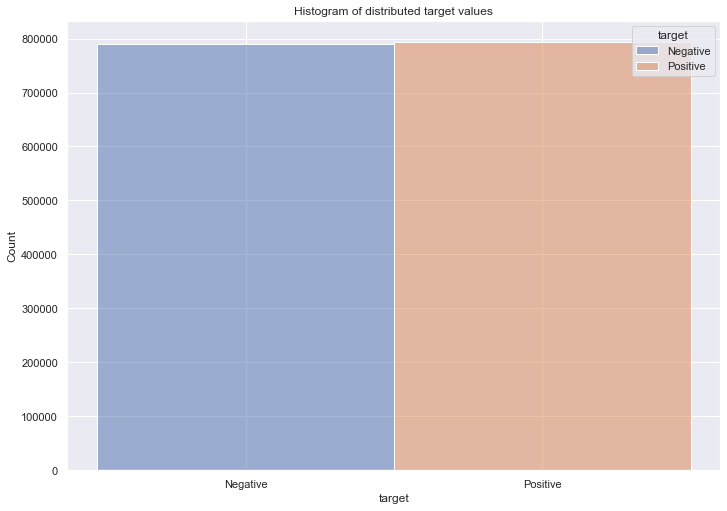

In [96]:
# analyzing destribuation
sns.histplot(data=df, x='target', hue='target').set_title('Histogram of distributed target values')

<b>NOTE:</b> As we can see we have pretty much-balanced class values.

In [97]:
# exploring predictor columns
df['predictor'].sample(10)

894113    @Maab You weren't feeling well today? Meh blue...
393453    @NatalieGolding and awww!!! so would i  aha an...
206415    all the way in town, forgot to go by and pick ...
861642    @annieluvsdmb Did I say I 'love&quot; in Canad...
300596    @shimo just had a funeral to go to today and i...
52008     Only had 6 hours of sleep, but I'm awake enoug...
699228    i have to buy my ticket for warped tourr! aahh...
436412             @andrewsayer At work, no cupcakes here  
230020    @Izzy_Chihuahua i know!!! It was really fun.. ...
225586    40 yr old transmissions eventually die  Fumble...
Name: predictor, dtype: object

<b>NOTE:</b> As we can see the predictor column has raw data (data that should be cleaned before fitted to the model). 

<h3>PRE-PROCESSING...</h3>

<p><b>NOTE:</b> Tweets consist of different types of values besides simple (relative) words. It could be hyperlinks, images, or punctuation marks. So, our work here is to remove all of this noise to make the prediction more accurate.</p>
<img src="img/1.jpeg" alt='Image cleaning'>

<p>Here, we are going to apply stemming or lemmatization. Stemming is the process of reducing inflected words to their word stem, base, or root form generally a written word form. Where lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.</p>
<img src="img/3.png" alt="StemmingAndLemmatization">

<p>Additionally, we will be dealing with user ids and hyperlinks in our string values.</p>
<img src="img/4.jpg" alt="Link">

<p>And finally, we will complete our pre-process by removing stop words. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.</p>
<img src="img/5.png" alt='Stop words'>

In [98]:
# creating instances for Stopwords and Stemming
stop_words = stopwords.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [99]:
snow_stemmer = SnowballStemmer('english')
snow_stemmer

In [100]:
# regular expression pattern
re_patter = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [101]:
def cleaning_data(data, isStemming=False):
    """
    Removing all noise.
        data: the text
        isStemming: the process of getting the normal forms of the words
    """
    data = re.sub(re_patter, " ", str(data).lower()).strip()
    data = data.split()
    token_list = []
    for word in data:
        if word not in stop_words:
            if isStemming:
                token_list.append(snow_stemmer.stem(word))
            else:
                token_list.append(word)
    return " ".join(token_list)

In [102]:
# applying pre-processing
df['predictor'] = df['predictor'].apply(lambda x: cleaning_data(x))
df.sample(5)

,target,predictor
587328,Negative,tried still work suggestions
433711,Negative,photo idea also back amp really itchy
1058707,Positive,fllw maritza 6121 hey fllwrs wl try thank ya m...
211457,Negative,pity djokovic
1414244,Positive,head 7 hours driving group people numerous win...


<h3>VISUALIZATION...</h3>

In [103]:
# visualizing the ratio/frequencies of positive and negative words
# link: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
def show_word_cloud(class_val):
    mask = df['target'] == class_val
    predictor_values = " ".join(df[mask]['predictor'])

    max_words = 1800
    width = 1300
    height = 500
    
    word_cloud = WordCloud(max_words=max_words,
                          width=width,
                          height=height)
    word_cloud = word_cloud.generate(predictor_values)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

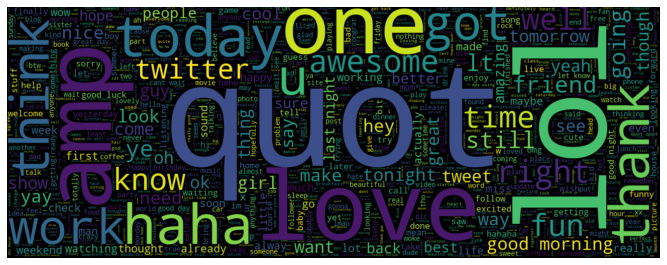

In [104]:
# show positives
show_word_cloud('Positive')

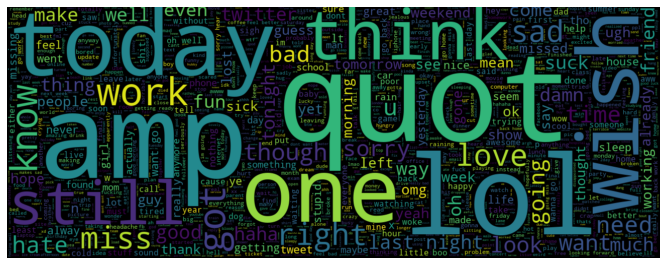

In [105]:
# show negatives
show_word_cloud('Negative')

<h3>TRAIN/TEST SPLIT...</h3>

In [106]:
# splitting our data
# link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train size: {train_data.shape}\nTest size: {test_data.shape}")

Train size: (1266952, 2)
Test size: (316739, 2)


<h3>TOKENIZATION...</h3>

<p><b>NOTE: </b>Tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module itself and can be used in programs as shown below.</p>
<img src="img/6.jpg" alt="tokenization">

In [107]:
# applying tokenization
# link: https://www.kaggle.com/arunrk7/nlp-beginner-text-classification-using-lstm
token_instance = Tokenizer()
token_instance.fit_on_texts(train_data['predictor'])

In [108]:
wordIndex = token_instance.word_index
vocabSize = len(token_instance.word_index) + 1
vocabSize

290412

In [110]:
# using pad_sequences to make the length of sequences the same. If it's too short adding pads, otherwise truncate it.
# link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
token_instance.texts_to_sequences

<bound method Tokenizer.texts_to_sequences of <keras_preprocessing.text.Tokenizer object at 0x0000024C46514D00>>

<img src="./img/11.png" alt='padding example'>

In [111]:
# defining function that deals with padding
def pad_trunc_funtion(data, col_name, max_length):
    return pad_sequences(token_instance.texts_to_sequences(data[col_name]),
                                     maxlen=max_length)

In [112]:
# applying padding 
MAX_SEQ_LENGTH = 30

X_train = pad_trunc_funtion(train_data, 'predictor', MAX_SEQ_LENGTH)
X_test = pad_trunc_funtion(test_data, 'predictor', MAX_SEQ_LENGTH)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1266952, 30)
Testing data shape: (316739, 30)


In [113]:
# checking the results after padding process
X_train[:4]

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,  71148,     43,     61,
            82,  28510,    398,     53,     58,    255,   1909,   1470,
         71149,    315,    462,    107,    107,    107],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0, 104920,     75,   1121,   6067,    254,   2005,
           416,     71,    595,  24573,  56432,     55],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
           124,    277,   6100,    276,   1258,   4917],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      

In [114]:
# creating variable with unique target values (classes)
classes = list(train_data['target'].unique())
classes

['Positive', 'Negative']

<h3>LABEL ENCODING...</h3>

<p><b>NOTE: </b>Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.</p>

In [115]:
# applying encoding and reshaping
encoder = LabelEncoder().fit(list(train_data['target']))

y_train = encoder.transform(list(train_data['target']))
y_test = encoder.transform(list(test_data['target']))

y_train.shape, y_test.shape

((1266952,), (316739,))

In [116]:
list(y_train[:15])

[1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [117]:
# reshaping 
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape, y_test.shape

((1266952, 1), (316739, 1))

In [118]:
y_train[:15]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

<h3>WORD EMBEDDING...</h3>

<p><b>NOTE: </b>Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. ... The input layer contains the context words and the output layer contains the current word.</p>
<img src="img/7.png" alt="word embedding">

In [119]:
# we're going to use GloVe: global vectors for word representation
# link: https://nlp.stanford.edu/projects/glove/
WORD_EMBEDDING = "../temp/glove.6B/glove.6B.50d.txt"

In [120]:
# creating function for word embedding. While dealing with NLP problems, we can use pre-trained word embeddings
# such as GloVe. Alternatively we can also train our own embeddings using Keras.
def open_read_word_embedding(path_file):
    counter = 0
    word_vectors = {}
    
    with open(path_file, mode='r', encoding="utf8") as we:
        try:
            for i in we:
                list_of_values = i.split()
                key = list_of_values[0]
                coefs = np.asarray(list_of_values[1:], dtype='float32')
                word_vectors[key] = coefs
        except:
            counter += 1
            print(we)
            
    print(f"There is/are {counter} lines with error.")
    return word_vectors

In [121]:
# calling 'open_read_word_embedding'
embedding_idx = open_read_word_embedding(WORD_EMBEDDING)
print(len(embedding_idx))

There is/are 0 lines with error.
400000


In [122]:
EMBEDDING_DIMENSION = 50
embedding_mtx = np.zeros((vocabSize, EMBEDDING_DIMENSION))
print(embedding_mtx.shape)
embedding_mtx[:1]

(290412, 50)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [123]:
counter = 0

for key, value in wordIndex.items():
    if key in embedding_idx.keys():
        vector = embedding_idx[key]
        embedding_mtx[value] = vector
        counter += 1
        
print(f"{counter} out of {len(embedding_mtx)} vectors were placed into matrix")

91422 out of 290412 vectors were placed into matrix


<h3>MODEL 1...</h3>

<p><b>NOTE: </b>Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks.</p>
<img src="img/8.png" alt="LSTM sample model diagram">

In [124]:
# creating embedding layer
# link for info about embedding layers: https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce
emb_layer = tf.keras.layers.Embedding(vocabSize, EMBEDDING_DIMENSION, 
                                      weights=[embedding_mtx],
                                      input_length=MAX_SEQ_LENGTH, 
                                      trainable=False)

<p><b>NOTE: </b>we will be using Long short-term memory (LSTM). Link for a refrence is provided below.</p>
<a href="https://en.wikipedia.org/wiki/Long_short-term_memory">Wikipedia page</a>
<br /><br /><b>Architecture: </b>
<ul>
    <li>Embedding Layer - <a href="https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526">read more...</a></li>
    <li>Conv1DLayer - <a href="https://keras.io/api/layers/convolution_layers/convolution1d/">read more...</a></li>
    <li>LSTM - <a href="https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610">read more...</a></li>
    <li>Dense - <a href="https://heartbeat.fritz.ai/classification-with-tensorflow-and-dense-neural-networks-8299327a818a">read more...</a></li>
</ul>

In [125]:
# initilizing our model_1
seq_input = Input(shape=(MAX_SEQ_LENGTH,), dtype='int32')
emb_sequence = emb_layer(seq_input)
x = SpatialDropout1D(0.2)(emb_sequence)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(seq_input, outputs)

<p><b>NOTE: </b>we're using Adam optimization algorithm for Gradient Descent.</p>
<a href="https://keras.io/api/optimizers/adam/">read more...</a>
<p><b>NOTE: </b>we'll be using 'LRScheduler' (<a href="https://keras.io/api/callbacks/learning_rate_scheduler/">read more...</a>) and 'ModelCheckPoint' (<a href="https://keras.io/api/callbacks/model_checkpoint/">read more...</a>) while we training our model.</p>

In [126]:
# compiling our model_1
LR = 0.01

model_1.compile(optimizer=Adam(learning_rate=LR), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

<h3>TRAINING...</h3>

In [127]:
# checking if we will be using GPU or CPU to train our model 1
if tf.config.list_physical_devices('GPU'):
    print(f"Using GPU to train model...")
else:
    print(f"Using CPU to train model...")

Using CPU to train model...


In [128]:
# training our model 1
BATCH_SIZE = 512
EPOCHS = 10

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr=0.01,
                                     monitor='val_loss',
                                     verbose=1)

history_1 = model_1.fit(X_train, y_train, 
                batch_size=BATCH_SIZE, 
                epochs=EPOCHS,
                validation_data=(X_test, y_test), 
                callbacks=[ReduceLROnPlateau])

Epoch 1/10
2475/2475 [==============================] - 1155s 465ms/step - loss: 0.5638 - accuracy: 0.7051 - val_loss: 0.5304 - val_accuracy: 0.7384
Epoch 2/10
2475/2475 [==============================] - 1150s 465ms/step - loss: 0.5422 - accuracy: 0.7230 - val_loss: 0.5114 - val_accuracy: 0.7450
Epoch 3/10
2475/2475 [==============================] - 1150s 465ms/step - loss: 0.5379 - accuracy: 0.7265 - val_loss: 0.5093 - val_accuracy: 0.7464
Epoch 4/10
2475/2475 [==============================] - 1158s 468ms/step - loss: 0.5362 - accuracy: 0.7281 - val_loss: 0.5075 - val_accuracy: 0.7476
Epoch 5/10
2475/2475 [==============================] - 1162s 470ms/step - loss: 0.5357 - accuracy: 0.7281 - val_loss: 0.5077 - val_accuracy: 0.7491
Epoch 6/10
2475/2475 [==============================] - 1125s 455ms/step - loss: 0.5352 - accuracy: 0.7284 - val_loss: 0.5051 - val_accuracy: 0.7492
Epoch 7/10
2475/2475 [==============================] - 1132s 457ms/step - loss: 0.5340 - accuracy: 0.7293

In [130]:
df_model_1_results = pd.DataFrame.from_dict(history_1.history)
df_model_1_results['epoch'] = [x for x in range(1, 11)]
df_model_1_results.head(5)

,loss,accuracy,val_loss,val_accuracy,lr,epoch
0,0.563753,0.705108,0.530374,0.738362,0.01,1
1,0.542236,0.723006,0.511429,0.744992,0.01,2
2,0.537859,0.726517,0.509302,0.746375,0.01,3
3,0.536215,0.728053,0.507468,0.747578,0.01,4
4,0.535734,0.728077,0.507651,0.749096,0.01,5


In [169]:
# let's see the accuracy loss
def show_loss_accuracy_function(history):
    """
    Display the loss and accuracy of the model.
    """
    col_names = [('loss', 'val_loss', 'Loss Function'),
                 ('accuracy', 'val_accuracy', 'Accuracy Function')]
    
    for i in col_names:
        plt.plot(history.history[i[0]], label='train')
        plt.plot(history.history[i[1]], label='test')
        plt.title(i[2])
        plt.legend()
        plt.show()

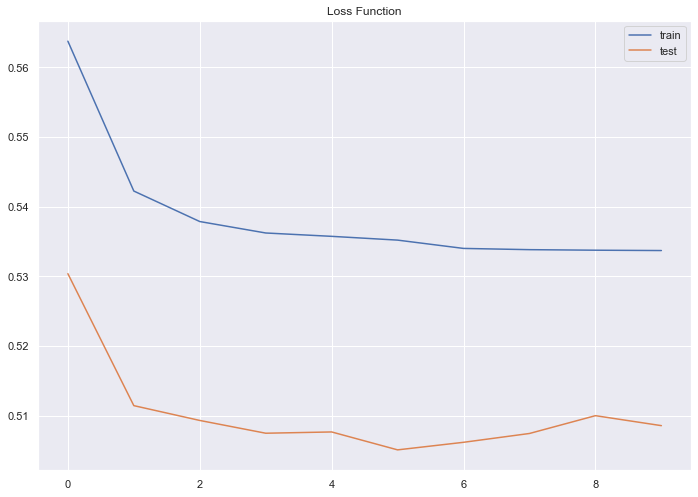

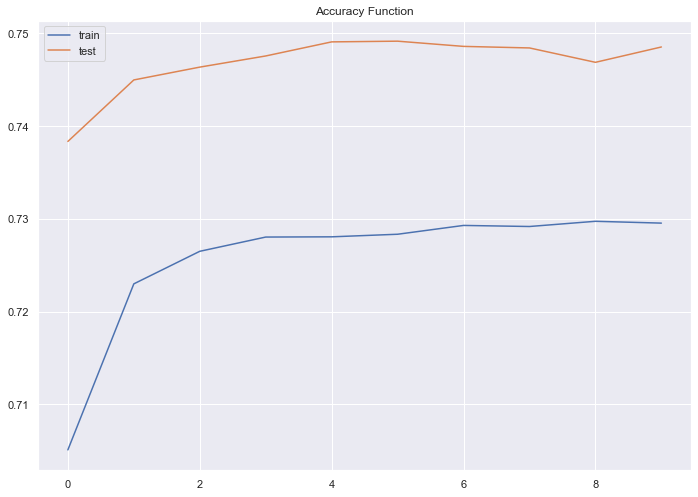

In [170]:
show_loss_accuracy_function(history_1)

<p><b>NOTE: </b>defining a threshold for the classification process.</p>

In [133]:
y_pred = model_1.predict(X_test, verbose=1, batch_size=512)
y_pred[:5]

619/619 [==============================] - 48s 78ms/step


array([[0.6076579 ],
       [0.65925443],
       [0.51440996],
       [0.14610681],
       [0.49870875]], dtype=float32)

In [134]:
y_pred = np.array([1 if x[0] > 0.5 else 0 for x in y_pred])
y_pred = np.reshape(y_pred, (-1, 1))
y_pred[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

<p><b>NOTE: </b>constructing confusion matrix.</p>

In [135]:
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)

[[117441  40046]
 [ 39599 119653]]


In [136]:
def create_confusion_matrix(cm):
    cm = cm.astype(float)
    total_neg = sum(cm[0])
    total_pos = sum(cm[1])
    cm[0][0] = round((cm[0][0] / total_neg), 2)
    cm[0][1] = round((cm[0][1] / total_neg), 2)
    cm[1][1] = round((cm[1][1] / total_pos), 2)
    cm[1][0] = round((cm[1][0] / total_pos), 2)
    
    df_cm = pd.DataFrame(cm, index=['Actual: NO', 'Actual: YES'], columns=['Predicted: NO', 'Predicted: YES'])
    sns.heatmap(df_cm, annot=True, annot_kws={'size': 20}).set_title('CONFUSION MATRIX')

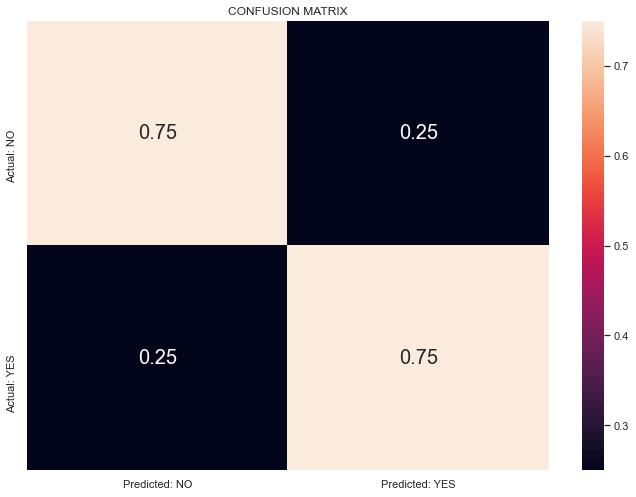

In [137]:
create_confusion_matrix(cm_1)

<p><b>NOTE: </b>building a text report showing the main classification metrics.</p>

In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred, target_names=['Class 0 - Negatives', 'Class 1 - Positives']))

                     precision    recall  f1-score   support

Class 0 - Negatives       0.75      0.75      0.75    157487
Class 1 - Positives       0.75      0.75      0.75    159252

           accuracy                           0.75    316739
          macro avg       0.75      0.75      0.75    316739
       weighted avg       0.75      0.75      0.75    316739



<p><b>NOTE: </b>saving model 1.</p>

In [140]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
model_1.save('./models/model_1/')

INFO:tensorflow:Assets written to: ./models/model_1/assets


<h3>MODEL 2...</h3>
<img src="./img/9.png">

<p><b>NOTE: </b>this model will be used as base line</p>

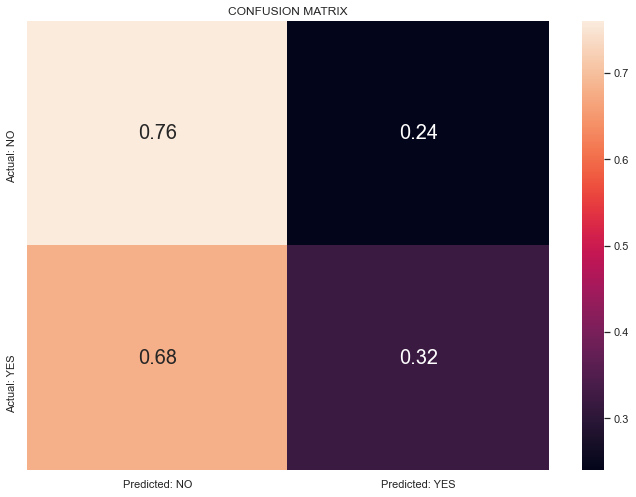

In [143]:
# creating model, fitting into data, getting predictive results, expressing in confusion matrix as outcome
model_2 = RandomForestRegressor(max_depth=5, random_state=42)
model_2.fit(X_train, y_train.ravel())

# model 2 - predict and evaluate
y_pred = model_2.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((-1, 1))

cm_2 = confusion_matrix(y_test, y_pred)
create_confusion_matrix(cm_2)

<h3>MODEL 3...</h3>
<img src="./img/10.png" alt='Sequential model'>

In [144]:
# creating model 3
EMBEDDING_DIMENSION = 100
MAX_SEQ_LENGTH = 30

model_3 = Sequential()
model_3.add(layers.Embedding(vocabSize, EMBEDDING_DIMENSION, input_length=MAX_SEQ_LENGTH))
model_3.add(layers.Conv1D(128, 5, activation='relu'))
model_3.add(layers.GlobalMaxPooling1D())
model_3.add(layers.Dense(10, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 100)           29041200  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 29,106,629
Trainable params: 29,106,629
Non-trainable params: 0
_________________________________________________________________


In [145]:
# fittig model
BATCH_SIZE = 512
EPOCHS = 10

history_3 = model_3.fit(X_train, y_train,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/10
2475/2475 [==============================] - 1196s 483ms/step - loss: 0.4675 - accuracy: 0.7757 - val_loss: 0.4490 - val_accuracy: 0.7871
Epoch 2/10
2475/2475 [==============================] - 1201s 485ms/step - loss: 0.3875 - accuracy: 0.8249 - val_loss: 0.4628 - val_accuracy: 0.7840
Epoch 3/10
2475/2475 [==============================] - 1239s 501ms/step - loss: 0.2969 - accuracy: 0.8715 - val_loss: 0.5175 - val_accuracy: 0.7730
Epoch 4/10
2475/2475 [==============================] - 1044s 422ms/step - loss: 0.2262 - accuracy: 0.9039 - val_loss: 0.6105 - val_accuracy: 0.7637
Epoch 5/10
2475/2475 [==============================] - 1065s 430ms/step - loss: 0.1825 - accuracy: 0.9225 - val_loss: 0.7205 - val_accuracy: 0.7573
Epoch 6/10
2475/2475 [==============================] - 1069s 432ms/step - loss: 0.1552 - accuracy: 0.9341 - val_loss: 0.8227 - val_accuracy: 0.7566
Epoch 7/10
2475/2475 [==============================] - 1081s 437ms/step - loss: 0.1377 - accuracy: 0.9413

In [146]:
# checking results
loss, accuracy = model_3.evaluate(X_train, y_train, verbose=1)
print(f'Training accuracy: {round(accuracy, 2)}')

39593/39593 [==============================] - 181s 5ms/step - loss: 0.0905 - accuracy: 0.9619
Training accuracy: 0.96


In [147]:
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=1)
print(f"Testing accuracy: {round(accuracy, 2)}")

9899/9899 [==============================] - 45s 5ms/step - loss: 1.2305 - accuracy: 0.7460
Testing accuracy: 0.75


In [171]:
# see the results of model 3
def preProcessForConfusionMatrix(history, model, X_test, y_test, epochs=11):
    show_loss_accuracy_function(history)

    y_pred = model.predict(X_test, verbose=1, batch_size=512)
    y_pred = np.array([1 if x[0] > 0.5 else 0 for x in y_pred])
    y_pred = np.reshape(y_pred, (-1, 1))
    cm = confusion_matrix(y_test, y_pred)

    create_confusion_matrix(cm)

    print(classification_report(y_test, y_pred, target_names=['Class 0 - Negatives', 'Class 1 - Positives']))

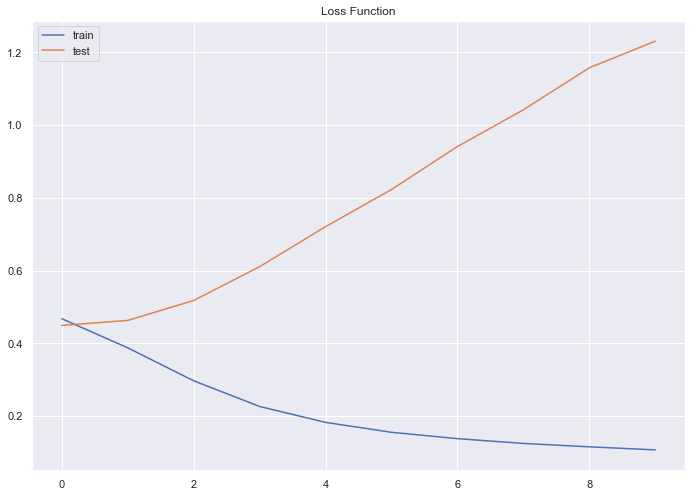

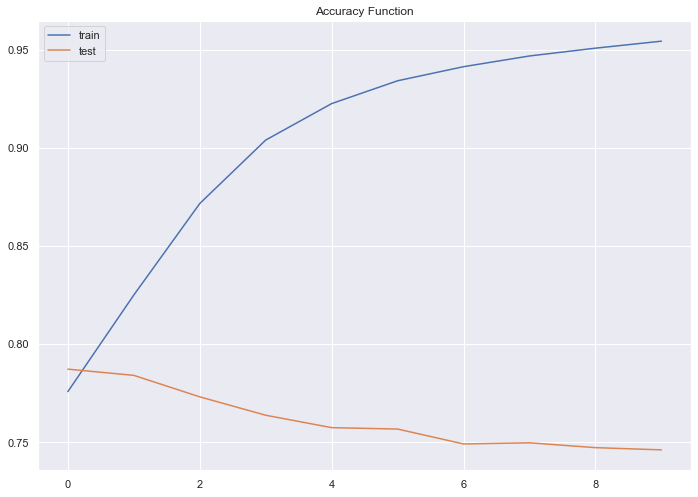

619/619 [==============================] - 18s 28ms/step
                     precision    recall  f1-score   support

Class 0 - Negatives       0.73      0.78      0.75    157487
Class 1 - Positives       0.77      0.71      0.74    159252

           accuracy                           0.75    316739
          macro avg       0.75      0.75      0.75    316739
       weighted avg       0.75      0.75      0.75    316739



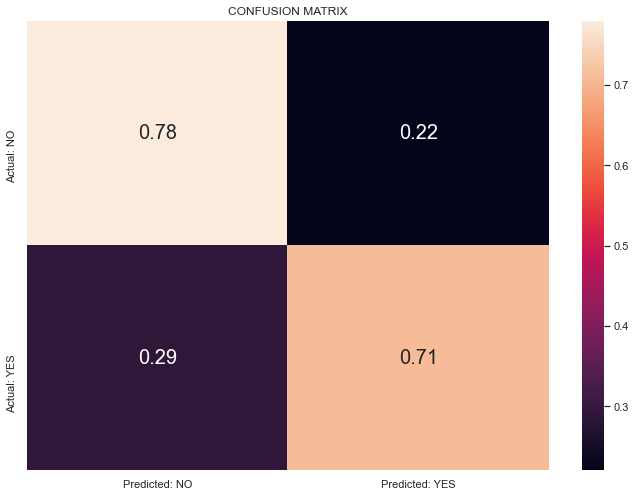

In [172]:
preProcessForConfusionMatrix(history_3, model_3, X_test, y_test)

In [150]:
# savimg model 3
model_3.save('./models/model_3/')

INFO:tensorflow:Assets written to: ./models/model_3/assets


<h3>MODEL 4...</h3>

In [151]:
# max number of words to be used
MAX_NB_WORDS = vocabSize
# max number of words in each tweet
MAX_SEQUENCE_LENGTH = MAX_SEQ_LENGTH
# embedding dimention
EMBEDDING_DIM = 100
# unique tokens
word_index = wordIndex

In [152]:
# creating model_4
model_4 = Sequential()
model_4.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQ_LENGTH))
model_4.add(SpatialDropout1D(0.2))
model_4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_4.add(Dense(15, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 100)           29041200  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 30, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 15)                1515      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 29,123,131
Trainable params: 29,123,131
Non-trainable params: 0
_________________________________________________________________


In [153]:
# fitting model_4
EPOCHS = 10
BATCH_SIZE = 512

history_4 = model_4.fit(X_train, y_train,
                   epochs=EPOCHS,
                   batch_size=BATCH_SIZE,
                   validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/10
2475/2475 [==============================] - 1902s 767ms/step - loss: 0.4719 - accuracy: 0.7724 - val_loss: 0.4495 - val_accuracy: 0.7870
Epoch 2/10
2475/2475 [==============================] - 1916s 774ms/step - loss: 0.4205 - accuracy: 0.8043 - val_loss: 0.4538 - val_accuracy: 0.7878
Epoch 3/10
2475/2475 [==============================] - 1921s 776ms/step - loss: 0.3866 - accuracy: 0.8232 - val_loss: 0.4605 - val_accuracy: 0.7851
Epoch 4/10
2475/2475 [==============================] - 1918s 775ms/step - loss: 0.3564 - accuracy: 0.8390 - val_loss: 0.4828 - val_accuracy: 0.7830
Epoch 5/10
2475/2475 [==============================] - 1921s 776ms/step - loss: 0.3281 - accuracy: 0.8527 - val_loss: 0.5116 - val_accuracy: 0.7785
Epoch 6/10
2475/2475 [==============================] - 1916s 774ms/step - loss: 0.3030 - accuracy: 0.8637 - val_loss: 0.5514 - val_accuracy: 0.7744
Epoch 7/10
2475/2475 [==============================] - 1914s 773ms/step - loss: 0.2838 - accuracy: 0.8715

In [154]:
# checking results
loss, accuracy = model_4.evaluate(X_train, y_train,
                                 verbose=1)
print(f"Training accuracy: {round(accuracy, 2)}\nTraining loss: {round(loss, 2)}")

39593/39593 [==============================] - 553s 14ms/step - loss: 0.2146 - accuracy: 0.9055
Training accuracy: 0.91
Training loss: 0.21


In [155]:
loss, accuracy = model_4.evaluate(X_test, y_test,
                                 verbose=1)
print(f"Testing accuracy: {round(accuracy, 2)}\Testing loss: {round(loss, 2)}")

9899/9899 [==============================] - 138s 14ms/step - loss: 0.6666 - accuracy: 0.7675s
Training accuracy: 0.77
Training loss: 0.67


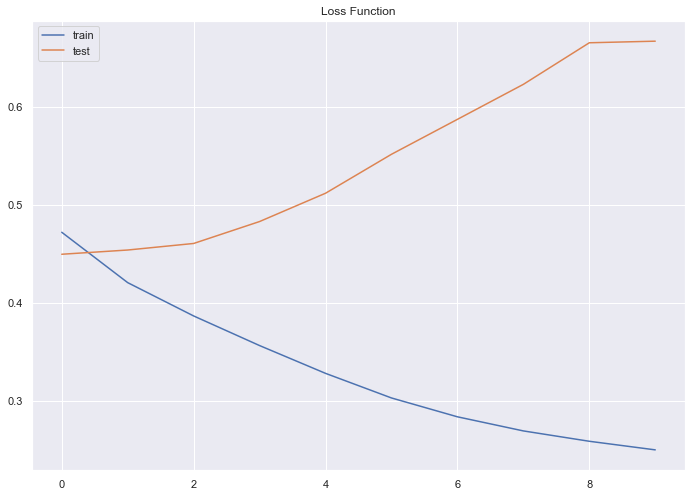

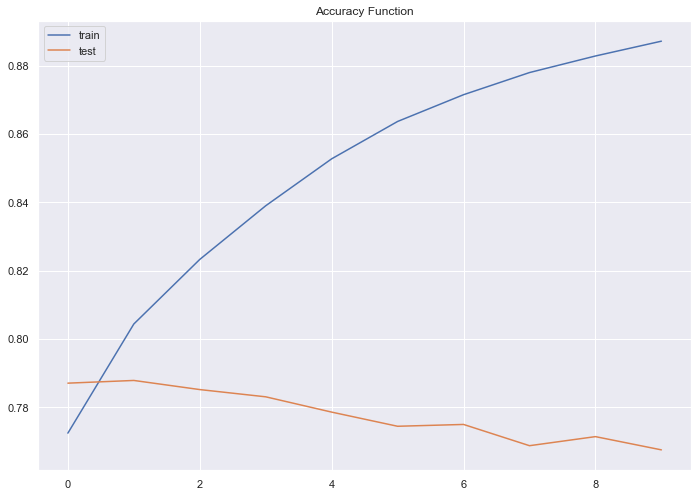

619/619 [==============================] - 55s 88ms/step
                     precision    recall  f1-score   support

Class 0 - Negatives       0.77      0.77      0.77    157487
Class 1 - Positives       0.77      0.77      0.77    159252

           accuracy                           0.77    316739
          macro avg       0.77      0.77      0.77    316739
       weighted avg       0.77      0.77      0.77    316739



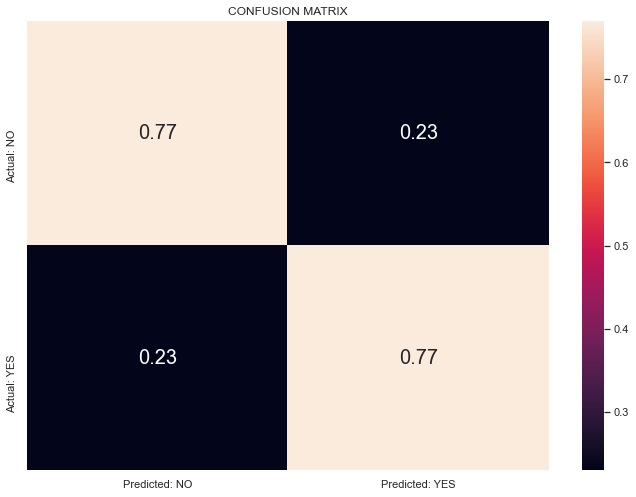

In [173]:
# visualization the results
preProcessForConfusionMatrix(history_4, model_4, X_test, y_test)

In [157]:
# saving model 4
model_4.save("./models/model_4/")

INFO:tensorflow:Assets written to: ./models/model_4/assets


<h3>HYPER-PARAMETER TUNING...</h3>

<p><b>NOTE: </b>here I will try to implement the function to hyper-tune my model. The only thing, I won't be using it because of hardware limitations (it will take too long for me to run). This is only for educational purposes.</p>

In [ ]:
# creating a new model
def create_new_model():
    EMBEDDING_DIMENSION = 100
    MAX_SEQ_LENGTH = 30

    model = Sequential()
    model.add(layers.Embedding(vocabSize, EMBEDDING_DIMENSION, input_length=MAX_SEQ_LENGTH))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    print(model.summary())
    
    return model

In [249]:
# defining param-grid
param_grid = {
    'num_filters': [32, 64, 128],
    'kernel_size': [3, 5, 7],
    'vocab_size': [vocabSize],
    'embedding_dim': [EMBEDDING_DIMENSION],
    'maxlen': [MAX_SEQ_LENGTH]
    
}

In [ ]:
# creating keras classifier and gridsearch object
model_tuning_1 = KerasClassifier(build_fn=create_new_model,
                                epochs=EPOCHS,
                                batch_size=BATCH_SIZE,
                                verbose=1)

grid = RandomizedSearchCV(estimator=model_tuning_1,
                         param_distributions=param_grid,
                         cv=20,
                         verbose=1,
                         n_iter=10)

grid_result = grid.fit(X_train, y_train)

In [ ]:
# evaluating test data
print(f"Test accuracy: {grid.score(X_test, y_test)}")
print(f"Best score: {grid_result.best_score_}")
printt(f"Best params: {grid_result.best_params_}")

<h3>MY OWN TESTING...</h3>

In [227]:
# testing tweets
new_tweets = ['shes was great',
              'worst day ever',
              'speech was terrible',
              'why on earth he was there?']
# models to test
models = [model_1, model_2, model_3, model_4]

In [228]:
# function to predict and analyse results
def testing_part(new_tweets, models):
    seq = token_instance.texts_to_sequences(new_tweets)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    for model in models:
        y_pred = model.predict(padded)
        y_pred = ['bad' if x <= 0.5 else 'good' for x in y_pred]
        print(y_pred)

In [230]:
# results
testing_part(new_tweets, models)

['good', 'bad', 'bad', 'good']
['good', 'good', 'bad', 'good']
['good', 'bad', 'bad', 'good']
['good', 'bad', 'bad', 'bad']


<h3>SUMMARY...</h3>

<p>So, working on data, we were able to identify a few issues that caused it to be inconsistent. At the beginning of the wrangling process, we have dropped unrelieved columns (because it is a Sentiment analyses task). Then, we dealt with duplicates and stop words in our tweets. Also, we used a regular expression to remove unnecessary characters. After, we stemmed out data in case to bring each word to its root for further necessary analysis. 
After we have done with wrangling, we split our data. Then we tokenized and padded it (to equal length size). Then we applied 'Label Encoding' to our target variable (converted categorical value to integer). 
After, we went through the process of 'Word Embedding' using the 'GloVe' technique (we used a pre-trained model in case to save time). 
Once the data was pre-processed we went to the next stage of making models. 
The first one was SLTM (short-long term memory model from CNN). It gave us decent results of F1: 75% and accuracy: 75%.
The second one was as the baseline classification model 'Random Forest'. The predictions were not as good as in the first model.
The third model was 'Sequential' one with five hidden layers. F1: 75% and accuracy: 75%.
The last one was also the 'Sequential' model but with a different combination of hidden layers. F1: 77% and accuracy: 77%. </p>